# VizMaster Final Project
## Group Members:  Ran Li, Xinzhe Deng, Yanyu Wang

### Air Quality Index (AQI) across all the states in 2017. 
### From: Environmental Protection Agency (EPA) https://aqs.epa.gov/aqsweb/airdata/download_files.html
#### Pre-generated data file containing the monitoring sites as well as the Ozone-related data it colleted, and we mainly focuses on one specific index (AQI) to complete some further analysis. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path

import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import cartopy.feature as cfeature

import ipywidgets
from ipywidgets import widgets
from ipywidgets import Label
from IPython.display import display
import IPython

from bqplot import (
    Figure, Map, Mercator, Orthographic, ColorScale, ColorAxis,
    AlbersUSA, topo_load, Tooltip, DateScale, LinearScale, Lines, Axis, Scatter
    )
from bqplot.interacts import (
    HandDraw
    )
import time

import traitlets
import datetime
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_loc = input('Place enter the path of the file: ')

Place enter the path of the file: VizMaster_airqualitydata.csv


In [3]:
daily_2017 = pd.read_csv(data_loc)
group_daily_2017 = daily_2017.groupby(["Latitude", "Longitude"])
group_daily_2017 = pd.DataFrame(group_daily_2017.count())
group_daily_2017 = group_daily_2017.reset_index()

### Where are the monitoring sites included in this dataset?

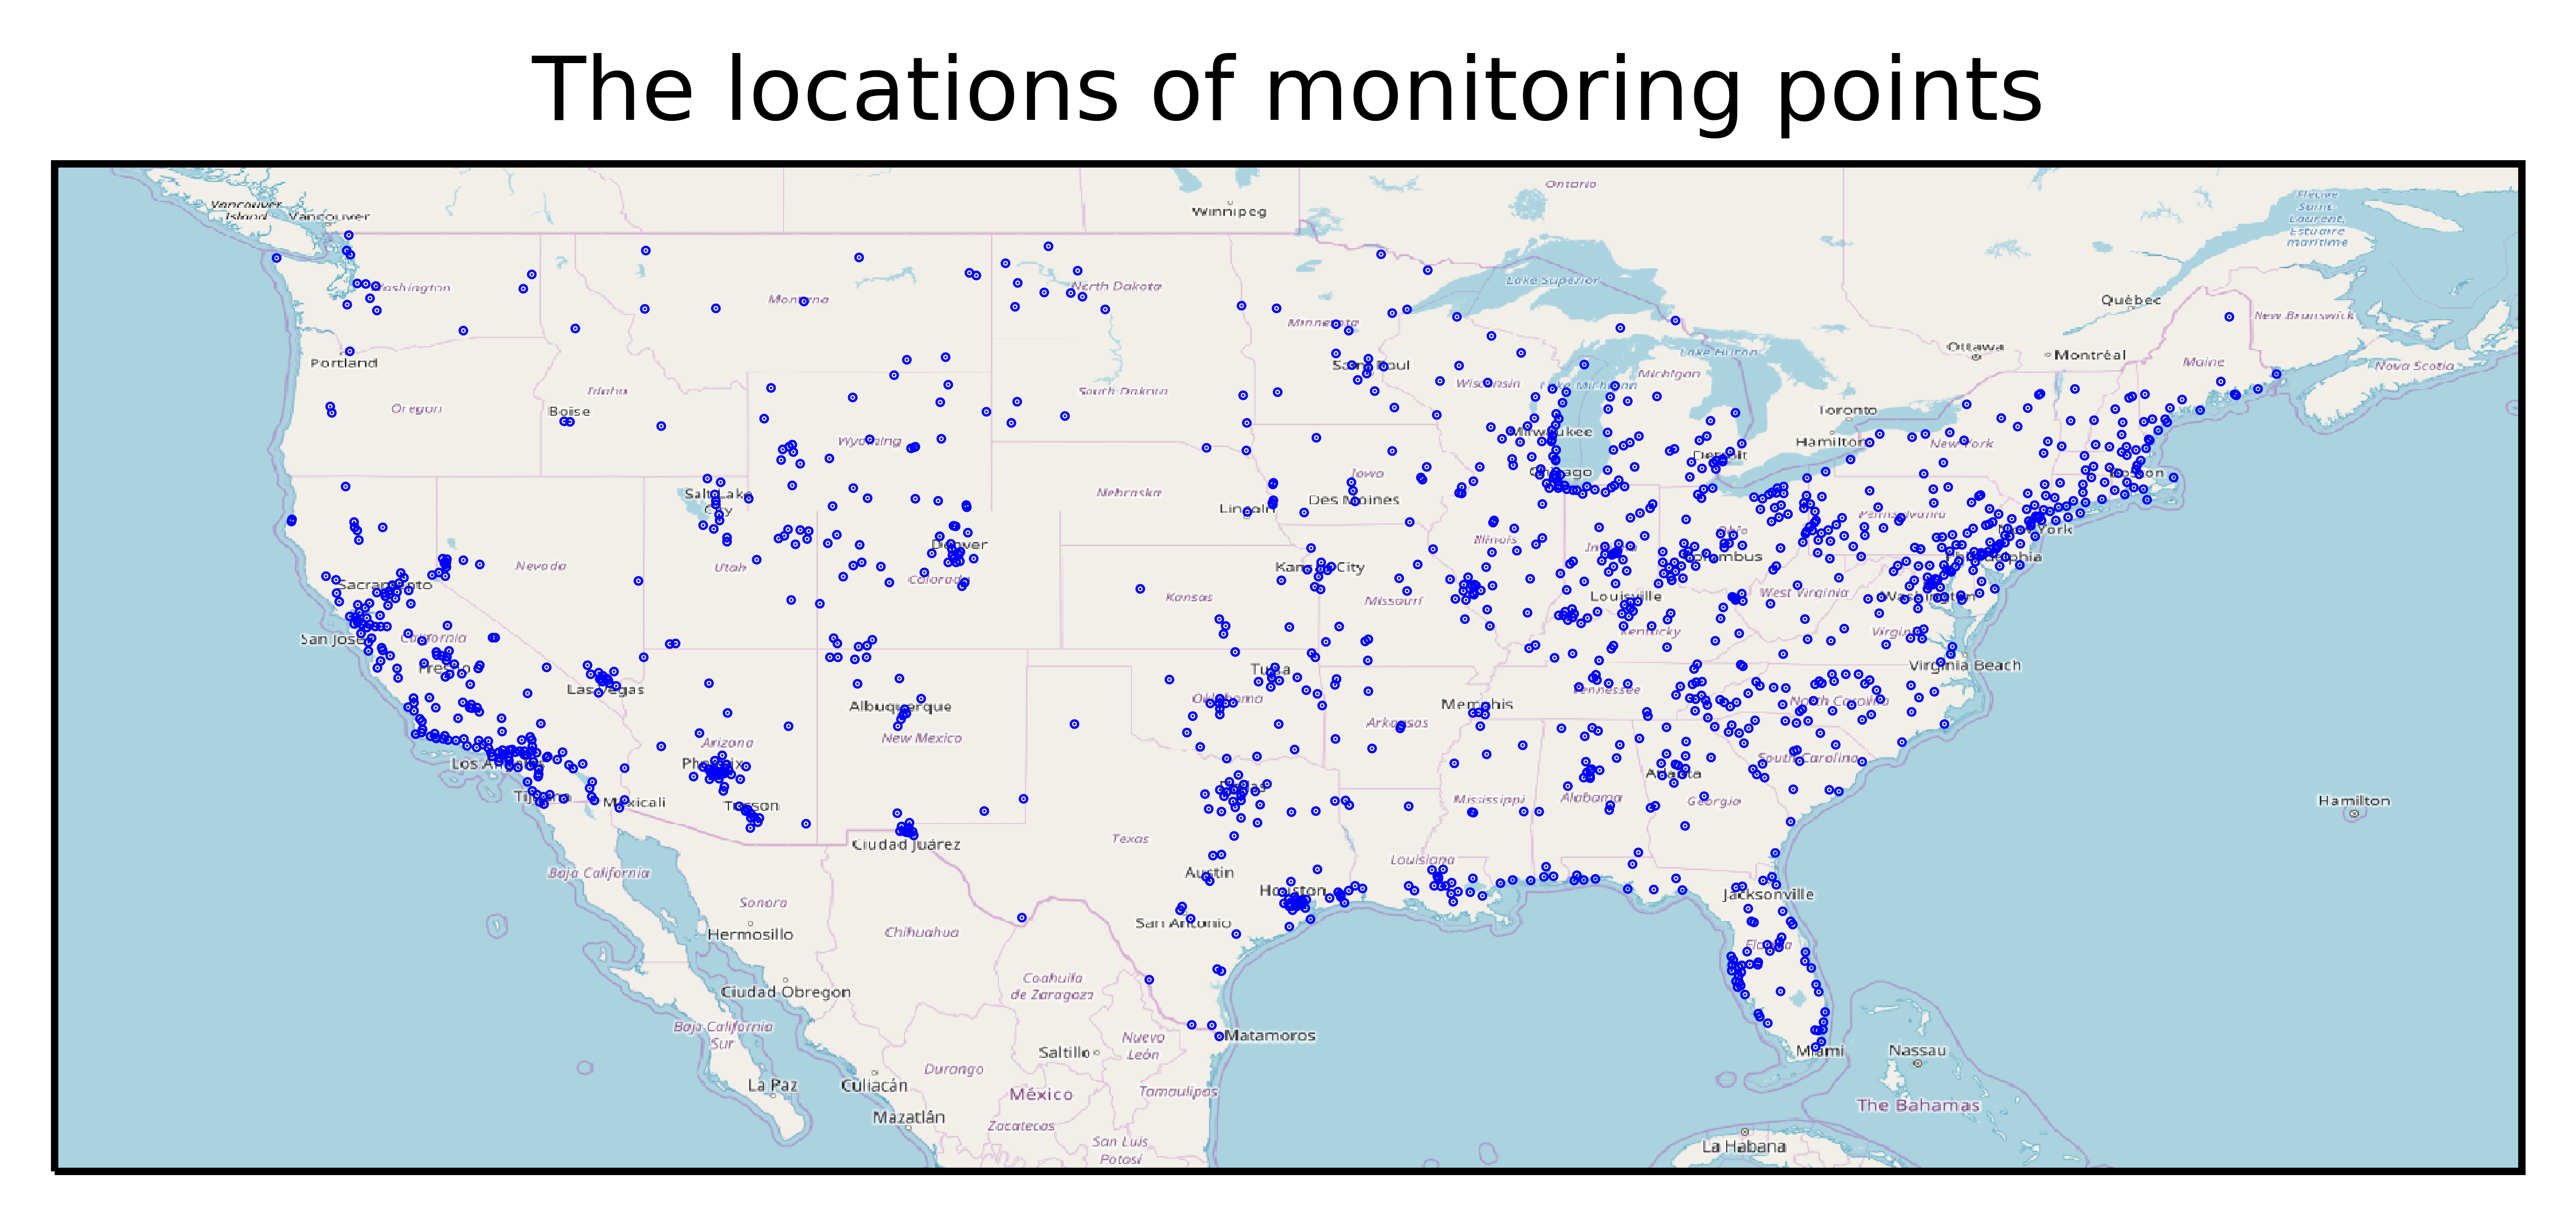

In [4]:
plt.rcParams["figure.dpi"] = 1000
def main():
    imagery = OSM()
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-60, -131, 51, 22], crs=ccrs.PlateCarree())
    
    states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

    ax.add_image(imagery, 5)
    ax.scatter(group_daily_2017["Longitude"], group_daily_2017["Latitude"], s=0.1,color='b')
    plt.title('The locations of monitoring points')
    
    plt.show()


if __name__ == '__main__':
    main()

#### This figure is representing the location of each AQI monitoring point in the United State. According to the map, the density of the distribution of AQI monitoring points can be clearly identified.

### How does AQI differ all across the US in 2017?

In [5]:
daily_2017 = pd.read_csv(data_loc)
def read_data(df_name):
    data = df_name
    return data

# read_data(daily_2017)

In [6]:
def read_data(df_name):
    data = df_name
    return data

data= pd.read_csv(data_loc)
dat = pd.read_csv(data_loc)
state_names = data["State Name"].unique()
state_list = ipywidgets.Dropdown(options = list(state_names), value='Illinois', description='State Name: ',)

@ipywidgets.interact(state = list(state_names))

def state_scatter(state = "Illinois"):
    data = read_data(dat)
    state_aqi = data.loc[data['State Name'] == state]
    state_aqi["Date Local"] = pd.to_datetime(state_aqi["Date Local"])
    
    x_date = state_aqi['Date Local'].unique()
    y_aqi = state_aqi.groupby("Date Local")["AQI"].mean()
    c_index = state_aqi.groupby("Date Local")["AQI"].mean()
    
    sc_x = DateScale()
    sc_y = LinearScale()
    sc_c = ColorScale(schema = 'GnYlRd_r')
    def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'], labels = ['Date Local', 'Average AQI'])
    
    scatter = Scatter(x = x_date, y = y_aqi, color = c_index, scales={'x': sc_x, 'y': sc_y, 'color': sc_c}, 
                  tooltip=def_tt)
    
    ax_x = Axis(label='Date Local', scale=sc_x, label_location='end')
    ax_y = Axis(label='Daily Average AQI', scale=sc_y, 
                orientation='vertical', side='left')
    ax_c = ColorAxis(scale=sc_c, label='AQI', orientation='vertical', side='right')
    
    m_chart = dict(top=50, bottom=70, left=50, right=60)
    
    fig = Figure(axes=[ax_x, ax_c, ax_y], marks=[scatter], fig_margin=m_chart, title = "Daily Average AQI of "+state+" in 2017")
    
    return fig


interactive(children=(Dropdown(description='state', index=13, options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico', 'Country Of Mexico'), value='Illinois'), Output()), _dom_classes=('widget-interact',))

#### Since the dataset consists of the daily AQI data in 2017, it would be nice to show the AQI data in the state that the users would like to check. Therefore, the graph above makes it possible for the users to first select the state that they'd like to check through the drop down menu in the top-left part; then the plot would change accordingly and the users can also check the AQI of any single day throughout 2017. 

In [7]:
def extract_pollution_dic(a_date,top_num):
        tem = data_through_time[data_through_time['Date Local']==a_date].sort_values(by='AQI').head(top_num)
        dic = {list(tem['State Code'])[_]:list(tem['AQI'])[_] for _ in range(len(list(tem['State Code'])))}
        return dic

In [8]:
class dynamic_plot:
        
    def data_process(data_loc):
        global daily_2017, data_through_time, extract_date, extract_state_dic
        daily_2017 = pd.read_csv(data_loc)
        data_through_time = daily_2017.groupby(['State Code', 'State Name', 'Date Local'])
        data_through_time = data_through_time.mean()
        data_through_time = data_through_time.reset_index()
        extract_date = sorted(list(set(daily_2017['Date Local'])))
        extract_state = sorted(list(set(daily_2017['State Name'])))
        extract_state_dic = {extract_state[_]:extract_state[_] for _ in range(len(extract_state))}
    
    def line_plot(the_index, the_state='Illinois'):
        _ = the_index
        print(_)
        line_hd.x=pd.to_datetime(list(data_through_time[data_through_time['State Name']==the_state].sort_values(by='Date Local').head(_)['Date Local']))
        line_hd.y=list(data_through_time[data_through_time['State Name']==the_state].sort_values(by='Date Local').head(_)['AQI'])
        line_figure.title = 'The Air Quality Index of {}'.format(the_state)
        
    def us_polution_line(): # color_={1:50}
        xs_hd = DateScale()
        ys_hd = LinearScale()
        global line_hd
        line_hd = Lines(x=pd.to_datetime(list(data_through_time[data_through_time['State Code']==45].sort_values(by='Date Local')['Date Local'])),
                        y=list(data_through_time[data_through_time['State Code']==45].sort_values(by='Date Local')['AQI']),
                        scales={'x': xs_hd, 'y': ys_hd}, colors=['red'])

    #     handdraw = HandDraw(lines=line_hd)
        xax = Axis(scale=xs_hd, label='Date', grid_lines='none')
        yax = Axis(scale=ys_hd, label='AQI', orientation='vertical', grid_lines='none')
        
        global line_figure
        line_figure = Figure(marks=[line_hd], axes=[xax, yax], title = 'The Air Quality Index of ')
        
        return line_figure
    
            
    def us_polution(): # color_={1:50}
        sc_geo = AlbersUSA()
        sc_c1 = ColorScale(scheme='YlOrRd',min=0,max=100)
        def_tt = Tooltip(fields=['id', 'name'])
        global states_map
        states_map = Map(map_data=topo_load('map_data/USStatesMap.json'), scales={'projection': sc_geo,'color': sc_c1},
                     color={}, colors={'default_color': 'Grey'}, interactions = {'click': 'select', 'hover': 'tooltip'},
                        tooltip=def_tt, label='1')
        axis = ColorAxis(scale=sc_c1, label='AQI  ')
        
        global map_figure
        map_figure = Figure(marks=[states_map], axes=[axis],title='US Air Quality Index for States in',
                      fig_margin={'bottom': 50, 'left': 10, 'right': 10, 'top': 70}, legend_style={'fill': 'black'},
                     legend_text={'name':'111'})
        return map_figure
    
    def map_plot(the_index):
        a_date=extract_date[the_index]
        for __ in [1]:
            try:
                states_map.color=extract_pollution_dic(a_date,100)
                print(3)
                map_figure.title='US Air Quality Index for States in {}'.format(a_date)
                print(states_map.title)
            except:
                continue

In [9]:
bf = dynamic_plot
bf.data_process(data_loc=data_loc)

play = widgets.Play(
#     interval=10,
    value=0,
    min=0,
    max=len(list(data_through_time[data_through_time['State Code']==45].sort_values(by='Date Local')['Date Local']))-1,
    step=1,
    description="Press play",
    disabled=False
)

time_progress= widgets.IntProgress(
    value=0,
    min=0,
    max=len(list(data_through_time[data_through_time['State Code']==45].sort_values(by='Date Local')['Date Local']))-1,
    step=1,
    description='Data Prog:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

select_state=widgets.Dropdown(
    options=extract_state_dic,
    value='California',
    description='The State:',
)

widgets.jslink((play, 'value'), (time_progress, 'value'))
widgets.interactive_output(bf.line_plot, {'the_index': play,'the_state':select_state})
widgets.interactive_output(bf.map_plot, {'the_index': play})

top_ = widgets.HBox([play,time_progress,select_state])
middle_ = widgets.HBox([bf.us_polution(),bf.us_polution_line()])
widgets.VBox([top_,middle_])
#         return aa, bb, cc, dd

VBox(children=(HBox(children=(Play(value=0, description='Press play', max=311), IntProgress(value=0, description='Data Prog:', max=311), Dropdown(description='The State:', index=4, options={'Alabama': 'Alabama', 'Alaska': 'Alaska', 'Arizona': 'Arizona', 'Arkansas': 'Arkansas', 'California': 'California', 'Colorado': 'Colorado', 'Connecticut': 'Connecticut', 'Country Of Mexico': 'Country Of Mexico', 'Delaware': 'Delaware', 'District Of Columbia': 'District Of Columbia', 'Florida': 'Florida', 'Georgia': 'Georgia', 'Hawaii': 'Hawaii', 'Idaho': 'Idaho', 'Illinois': 'Illinois', 'Indiana': 'Indiana', 'Iowa': 'Iowa', 'Kansas': 'Kansas', 'Kentucky': 'Kentucky', 'Louisiana': 'Louisiana', 'Maine': 'Maine', 'Maryland': 'Maryland', 'Massachusetts': 'Massachusetts', 'Michigan': 'Michigan', 'Minnesota': 'Minnesota', 'Mississippi': 'Mississippi', 'Missouri': 'Missouri', 'Montana': 'Montana', 'Nebraska': 'Nebraska', 'Nevada': 'Nevada', 'New Hampshire': 'New Hampshire', 'New Jersey': 'New Jersey', 'New Mexico': 'New Mexico', 'New York': 'New York', 'North Carolina': 'North Carolina', 'North Dakota': 'North Dakota', 'Ohio': 'Ohio', 'Oklahoma': 'Oklahoma', 'Oregon': 'Oregon', 'Pennsylvania': 'Pennsylvania', 'Puerto Rico': 'Puerto Rico', 'Rhode Island': 'Rhode Island', 'South Carolina': 'South Carolina', 'South Dakota': 'South Dakota', 'Tennessee': 'Tennessee', 'Texas': 'Texas', 'Utah': 'Utah', 'Vermont': 'Vermont', 'Virginia': 'Virginia', 'Washington': 'Washington', 'West Virginia': 'West Virginia', 'Wisconsin': 'Wisconsin', 'Wyoming': 'Wyoming'}, value='California'))), HBox(children=(Figure(axes=[ColorAxis(label='AQI  ', scale=ColorScale(max=100.0, min=0.0, scheme='YlOrRd'))], fig_margin={'bottom': 50, 'left': 10, 'right': 10, 'top': 70}, layout=Layout(min_width='125px'), legend_style={'fill': 'black'}, legend_text={'name': '111'}, marks=[Map(colors={'default_color': 'Grey'}, hovered_styles={'hovered_fill': 'Orange', 'hovered_stroke': None, 'hovered_stroke_width': 2.0}, interactions={'click': 'select', 'hover': 'tooltip'}, map_data={'type': 'Topology', 'objects': {'land': {'type': 'MultiPolygon', 'properties': {'counties': None}, 'arcs': [[[5830, 6026, 6034, 6073, 6164, 6179, 6023, 6043, 6231, 6416, 6410, 6564, 6243, 6565, 6546, 6475, 6542, 6784, 6741, 6811, 6739, 6870, 6965, 7087, 7246, -7086, 7247, 7255, 7256, 7257, 7305, 7566, 9399, 7668, 9397, -7836, 9398, 7838, 8050, 8017, 8018, 8019, 8020, 8021, 8047, 8023, 8252, 8247, 8302, 8493, 8575, -8491, 8576, 8671, 8807, 8877, 8984, 9074, 9116, 9138, 9129, 9073, 8960, 8874, 8961, 8956, 8957, 9090, 9130, 9181, -9123, 9182, 9125, 9177, 9255, 9278, 9279, 9280, 9311, 9306, 9307, 9308, 9309, 9318, 9340, 9347, 9342, 9343, 9344, 9345, 9349, 9338, 9326, 9317, 9284, 9315, 9286, 9266, 9241, 9239, 9214, 9200, 9170, 9113, 9114, 9350, 8936, 8837, 8937, 9039, 8977, 9038, 8979, 8884, 8980, 8886, 8777, -8768, 8778, 8770, 8761, 8755, 8642, 8643, 8644, 8667, 8810, 8833, 8851, 8819, 8981, 9002, 8999, 9000, 9064, 8974, 9059, -8971, 9053, 9054, 9055, 9056, 9057, 9083, 9044, 9023, 9011, 9034, 8988, 9065, 9108, 9067, 8991, 9107, 9109, 9152, 9193, 9141, 9196, 9143, 9144, 9145, 9156, 9195, 9206, 9226, 9190, 9227, 9208, 9222, 9232, 9225, 9233, 9234, 9235, 9252, 9273, 9303, 9334, 9339, 9331, 9328, 9292, 9231, 9167, 9104, 8944, 8844, 8841, 8854, 8358, 8360, 7864, 8080, 8008, 8177, 8470, 8160, 7700, 7715, 7672, 7495, 7030, 6995, 6876, 6510, 5861, 5585, 5267, 5171, 5264, 5415, 5133, 4992, 4822, 4518, 4663, 4437, 4662, 4439, 4447, 4816, 4449, 3587, 2648, 2337, 1859, 1579, 1433, 1268, 954, 753, 600, 639, 586, 588, 454, 330, 221, 175, 222, 306, 264, 358, 261, 359, 308, 394, 357, 294, 184, 172, 185, 126, 2, 73, 83, 78, 81, 22, 34, 18, 41, 97, 86, 44, 48, 27, 8, 51, 108, 91, 96, 101, 38, 30, 62, 66, 55, 58, 104, 9351, 123, 139, 192, 9352, 191, 134, 9354, 9356, 9357, 541, 465, 421, 9362, 433, 9366, 9368, 472, 9377, 9374, 9375, 9379, 554, 9369, 690, 9370, 854, 855, 856, 1128, 1140, 9371, 1138, 1259, 1443, 1591, 1767, 1926, 1992, 2081,

#### The figures in this block are representing the AQI of each states and the variation trend of the selected state in the US, respectively. In the left figure, the color of each state is corresponding to the actual AQI value of the selected date. With the date changing, AQI is changing accoring to the date too. On the right side, the line represents the AQI of the chosen state. The line grows when time is iterating.
#### For the widgets above the figures, the progressing of the time can be controlled by the most left widgets. The figures changes when time is iterating. The widget in the middle represents how is the progress of the time. Gray in the progressing bar is meaning the remaining dates to plot. Blue means the dates that already showed. The last widgets represents which state that shows in the right line graph. The state can be selected via the drop-down menu.

In [10]:
t=pd.read_csv(data_loc)
def add_month(Ozone_data):    
    c=[]
    for i in Ozone_data["Date Local"]:
        datee = datetime.datetime.strptime(i, "%Y-%m-%d")
        c.append(datee.month)
    b=Ozone_data.assign(month=c)
    return b

from ipywidgets import widgets 
@ipywidgets.interact(Select_Month={'Jan':1,'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,'Nov': 11, 'Dec': 12},
                 Options={'Greatest': 10, 'Worst': -10})    
def show_month(Select_Month,Options):
    Ozone_data = add_month(t)
    real_month=Ozone_data.loc[Ozone_data["month"]==Select_Month]
    real_month=real_month.groupby(["State Name"])
    real_month=real_month.mean()
    real_month=real_month.reset_index()
    real_month.sort_values("AQI", inplace=True)
    if Options==10:
        b=real_month[0:Options].reset_index()
    if Options==-10:
        b=real_month[Options:].reset_index()
    plt.bar(b["State Name"],b["AQI"],width=0.5, color='#D55D43')
    plt.xlabel('State Names', fontsize=20)
    plt.xticks(rotation = 45, fontsize = 14)
    plt.ylabel('Average AQI', fontsize=20)
    plt.yticks(rotation = 45, fontsize = 14)
    plt.title('Top 10 States in '+ calendar.month_name[Select_Month], fontsize =28)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()

interactive(children=(Dropdown(description='Select_Month', options={'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}, value=1), Dropdown(description='Options', options={'Greatest': 10, 'Worst': -10}, value=10), Output()), _dom_classes=('widget-interact',))

#### We are interested in mean AQI in each state in United States because we could find the top 10 greatest and top 10 worst AQI state in United States. The users could use this to predict which state is better to live in terms of air quality. It can be done through two drop-down boxes containing the month and whether the best or the worst when plotting the average AQI